In [ ]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# **REGIONAL ANALYSIS**



In [ ]:
file_path = 'data survey.csv'
dataframe = pd.read_csv(file_path)

print(dataframe)

                         id                  name   age    age_range  \
0       id_4100001227501134                Sultan   NaN          NaN   
1       id_4100001746833302          Arief Rahman  23.0  22-30 tahun   
2       id_4100001746833302          Arief Rahman  23.0  22-30 tahun   
3       id_4100001746833302          Arief Rahman  23.0  22-30 tahun   
4       id_4100001746833302          Arief Rahman  23.0  22-30 tahun   
...                     ...                   ...   ...          ...   
425327  id_4100026362102517          Elcha Borreg   NaN          NaN   
425328  id_4100026474571982            Nda Ridwan   NaN          NaN   
425329  id_4100026474571982            Nda Ridwan   NaN          NaN   
425330  id_4100029181741974  Marlin Fitri Wahyuni  25.0  22-30 tahun   
425331  id_4100029181741974  Marlin Fitri Wahyuni  25.0  22-30 tahun   

                  province         city  gender    interest interest_detail  
0                      NaN          NaN     NaN   Fotogra

In [ ]:
# Menghitung jumlah data total
jumlah_data_total = dataframe.shape[0]
print("Jumlah data total:", jumlah_data_total)

# Menghitung jumlah data unique
jumlah_data_unik_audiens = dataframe['id'].nunique()
print("Jumlah data unik dari audiens:", jumlah_data_unik_audiens)

# Menghitung jumlah missing value
jumlah_features = len(dataframe.columns)
print("Jumlah features dalam data:", jumlah_features)

# Mengecek apakah ada missing values dalam setiap kolom
missing_values = dataframe.isna().sum()
print("Missing values dalam dataset:")
print(missing_values)

Jumlah data total: 425332
Jumlah data unik dari audiens: 164621
Jumlah features dalam data: 9
Missing values dalam dataset:
id                      0
name                    3
age                160297
age_range          160297
province           108031
city               108031
gender              50881
interest                0
interest_detail    302494
dtype: int64


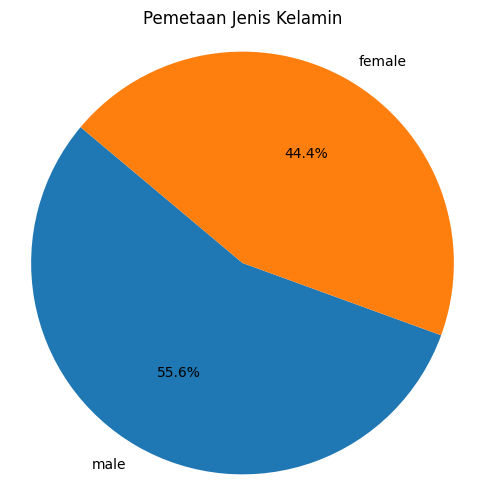

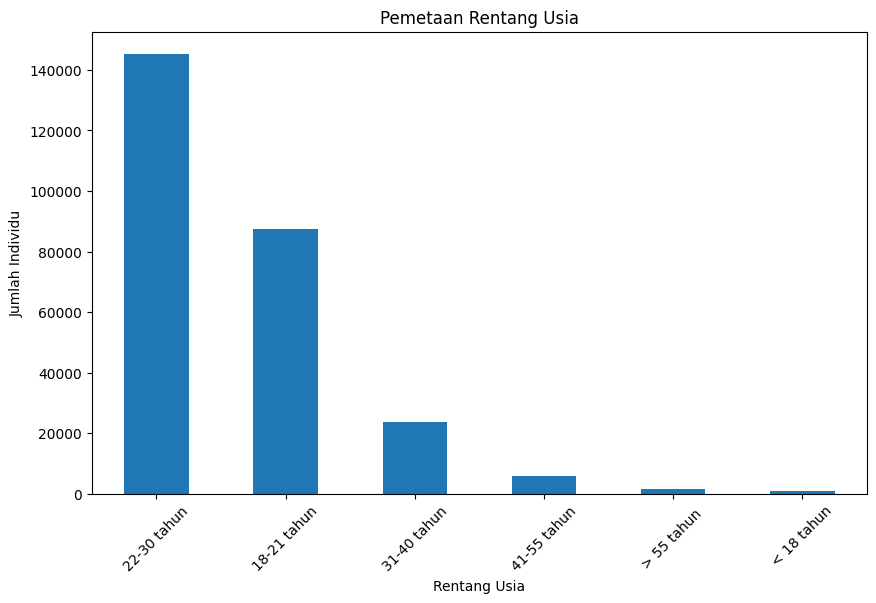

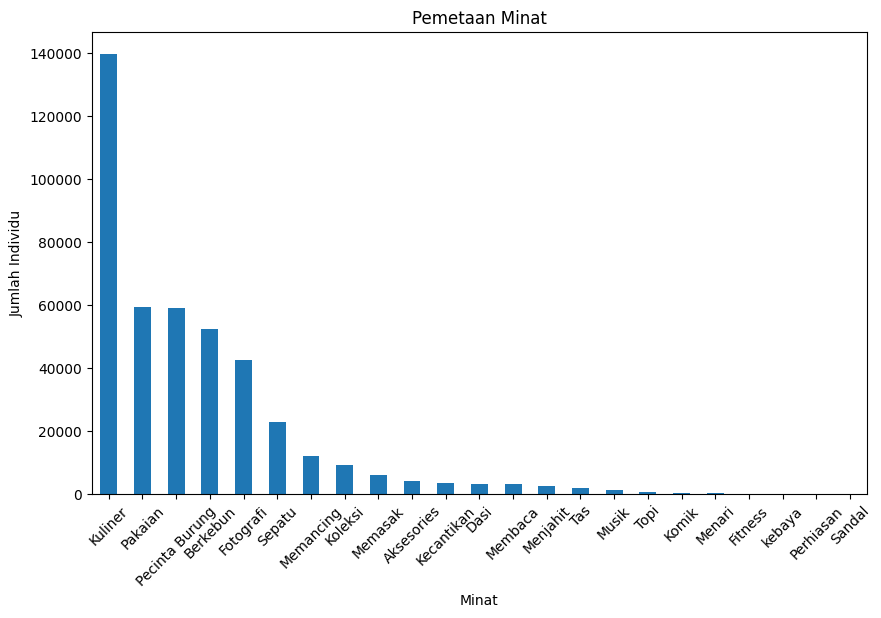

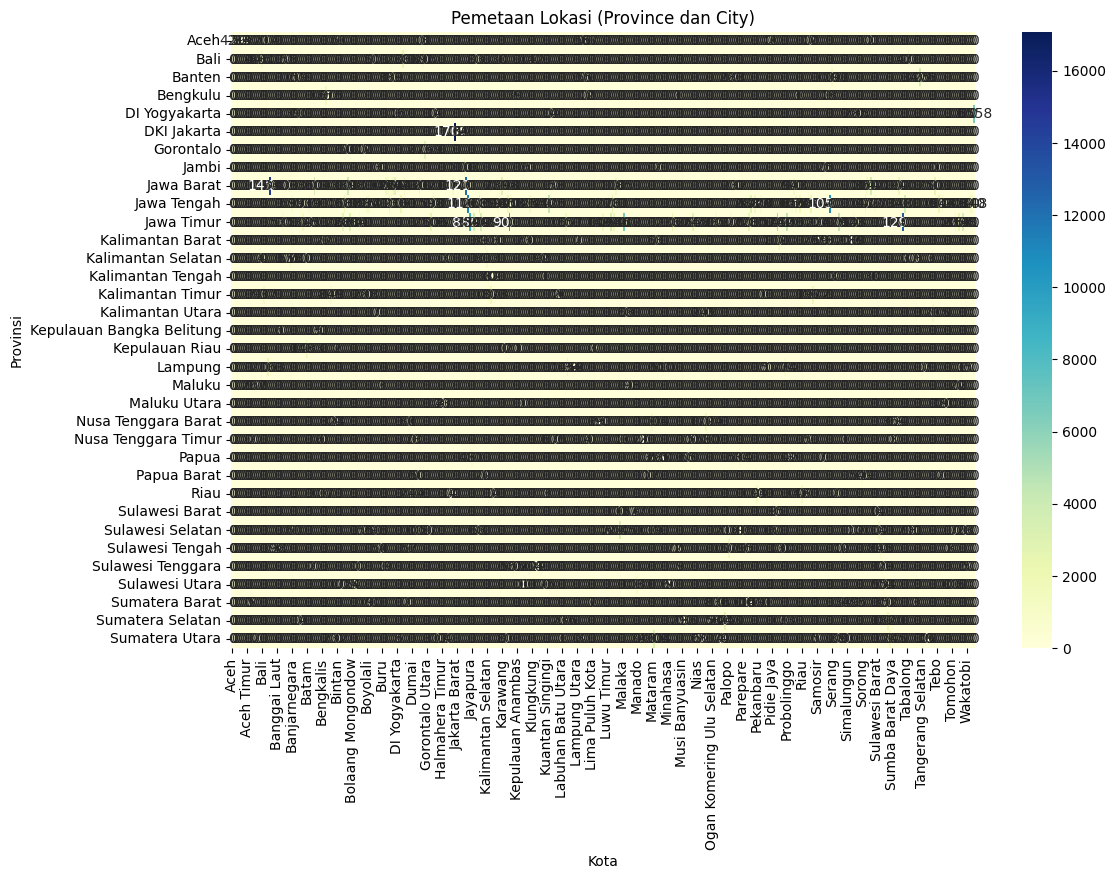

In [ ]:
# Menghitung jumlah masing-masing jenis kelamin
gender_counts = dataframe['gender'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pemetaan Jenis Kelamin')
plt.axis('equal')
plt.show()

# Menghitung jumlah individu dalam setiap rentang usia
age_range_counts = dataframe['age_range'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
age_range_counts.plot(kind='bar')
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah Individu')
plt.title('Pemetaan Rentang Usia')
plt.xticks(rotation=45)
plt.show()

# Menghitung jumlah individu dalam setiap tingkat pendidikan
education_counts = dataframe['interest'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar')
plt.xlabel('Minat')
plt.ylabel('Jumlah Individu')
plt.title('Pemetaan Minat')
plt.xticks(rotation=45)
plt.show()

# Menghitung jumlah individu dalam setiap provinsi dan kota
location_counts = dataframe.groupby(['province', 'city']).size().unstack(fill_value=0)

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(location_counts, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Kota')
plt.ylabel('Provinsi')
plt.title('Pemetaan Lokasi (Province dan City)')
plt.show()

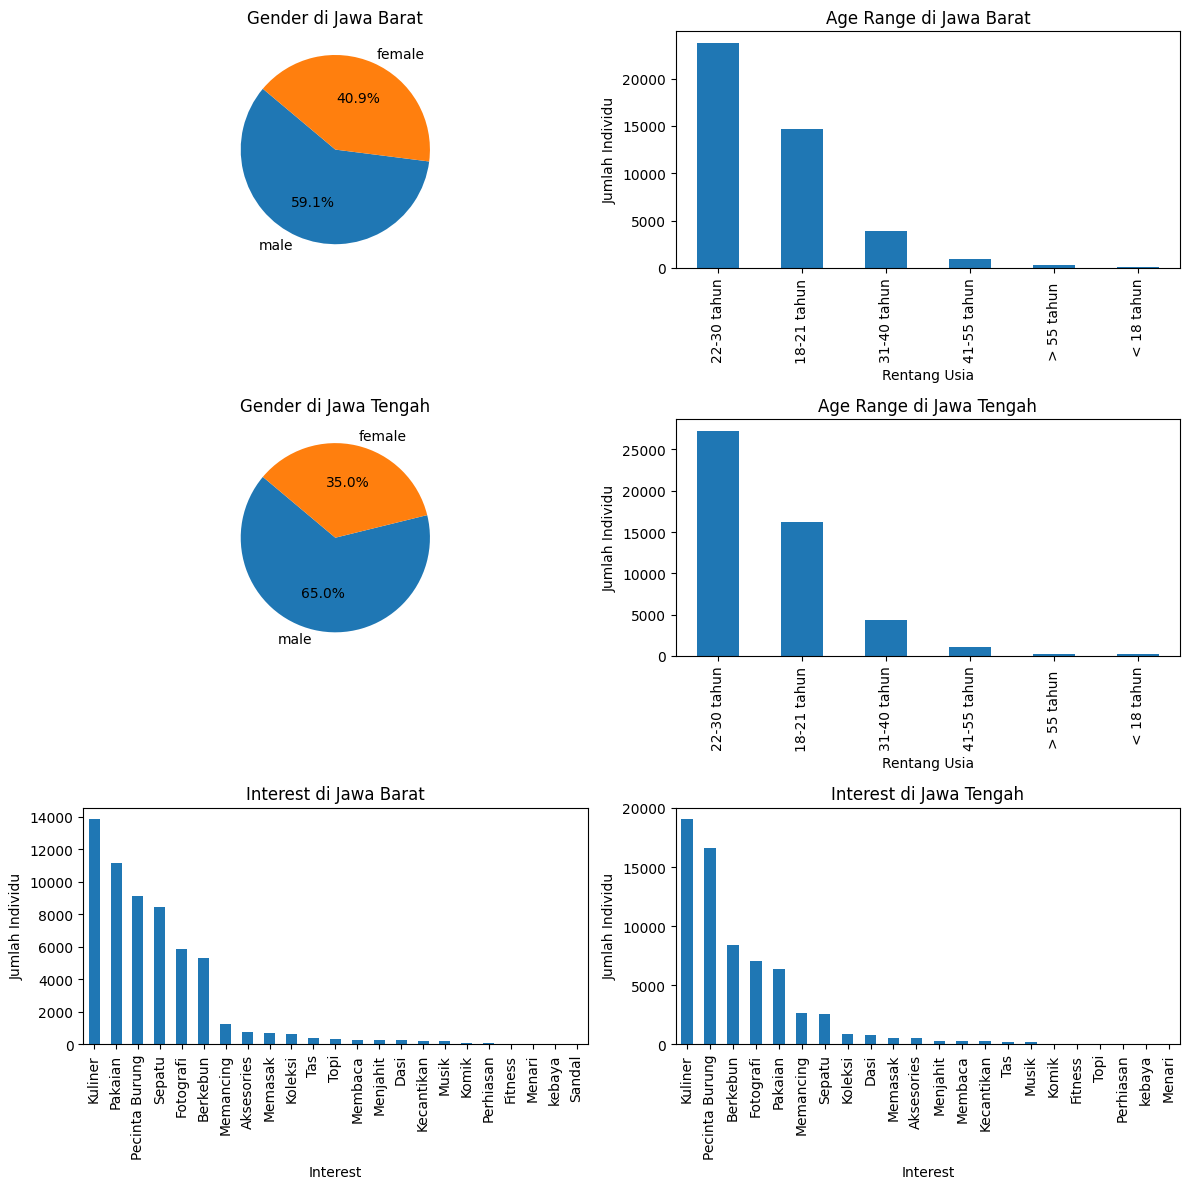

In [ ]:
# Filter data untuk Jawa Barat
data_jawa_barat = dataframe[dataframe['province'] == 'Jawa Barat']

# Filter data untuk Jawa Tengah
data_jawa_tengah = dataframe[dataframe['province'] == 'Jawa Tengah']

# Pemetaan Demografi (Gender) di Jawa Barat
gender_counts_jawa_barat = data_jawa_barat['gender'].value_counts()

# Pemetaan Demografi (Age Range) di Jawa Barat
age_range_counts_jawa_barat = data_jawa_barat['age_range'].value_counts()

# Pemetaan Demografi (Interest) di Jawa Barat
interest_counts_jawa_barat = data_jawa_barat['interest'].value_counts()

# Pemetaan Demografi (Gender) di Jawa Tengah
gender_counts_jawa_tengah = data_jawa_tengah['gender'].value_counts()

# Pemetaan Demografi (Age Range) di Jawa Tengah
age_range_counts_jawa_tengah = data_jawa_tengah['age_range'].value_counts()

# Pemetaan Demografi (Interest) di Jawa Tengah
interest_counts_jawa_tengah = data_jawa_tengah['interest'].value_counts()

# Membuat visualisasi
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Pemetaan Demografi Gender di Jawa Barat
axs[0, 0].pie(gender_counts_jawa_barat, labels=gender_counts_jawa_barat.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].set_title('Gender di Jawa Barat')

# Pemetaan Demografi Age Range di Jawa Barat
age_range_counts_jawa_barat.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_xlabel('Rentang Usia')
axs[0, 1].set_ylabel('Jumlah Individu')
axs[0, 1].set_title('Age Range di Jawa Barat')

# Pemetaan Demografi Gender di Jawa Tengah
axs[1, 0].pie(gender_counts_jawa_tengah, labels=gender_counts_jawa_tengah.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].set_title('Gender di Jawa Tengah')

# Pemetaan Demografi Age Range di Jawa Tengah
age_range_counts_jawa_tengah.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_xlabel('Rentang Usia')
axs[1, 1].set_ylabel('Jumlah Individu')
axs[1, 1].set_title('Age Range di Jawa Tengah')

# Pemetaan Demografi Interest di Jawa Barat
interest_counts_jawa_barat.plot(kind='bar', ax=axs[2, 0])
axs[2, 0].set_xlabel('Interest')
axs[2, 0].set_ylabel('Jumlah Individu')
axs[2, 0].set_title('Interest di Jawa Barat')

# Pemetaan Demografi Interest di Jawa Tengah
interest_counts_jawa_tengah.plot(kind='bar', ax=axs[2, 1])
axs[2, 1].set_xlabel('Interest')
axs[2, 1].set_ylabel('Jumlah Individu')
axs[2, 1].set_title('Interest di Jawa Tengah')

plt.tight_layout()
plt.show()

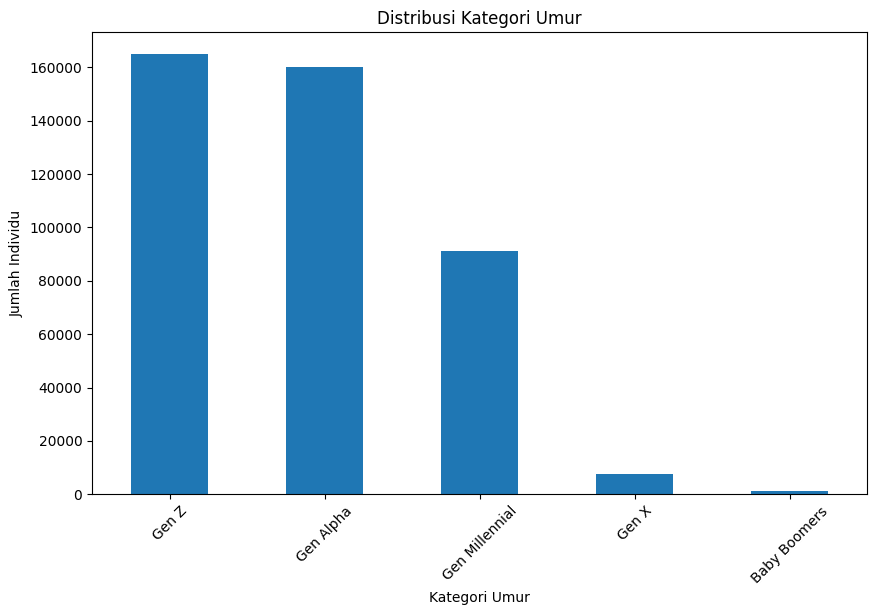

In [ ]:
# Fungsi untuk mengkategorikan umur
def categorize_age(age):
    if age >= 60:
        return 'Baby Boomers'
    elif age >= 40:
        return 'Gen X'
    elif age >= 25:
        return 'Gen Millennial'
    elif age >= 10:
        return 'Gen Z'
    else:
        return 'Gen Alpha'

# Menggunakan apply() untuk membuat kolom kategori umur baru
dataframe['age_category'] = dataframe['age'].apply(categorize_age)

import matplotlib.pyplot as plt

# Menghitung jumlah individu dalam setiap kategori umur
age_category_counts = dataframe['age_category'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
age_category_counts.plot(kind='bar')
plt.xlabel('Kategori Umur')
plt.ylabel('Jumlah Individu')
plt.title('Distribusi Kategori Umur')
plt.xticks(rotation=45)
plt.show()

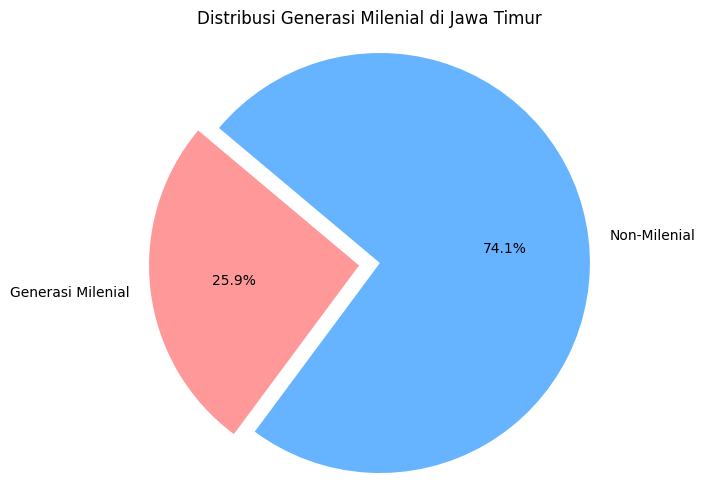

In [ ]:
import matplotlib.pyplot as plt

# Filter data untuk Jawa Timur
data_jawa_timur = dataframe[dataframe['province'] == 'Jawa Timur']

# Menghitung jumlah individu generasi milenial di Jawa Timur
millennial_counts_jawa_timur = data_jawa_timur[data_jawa_timur['age_category'] == 'Gen Millennial'].shape[0]

# Menghitung jumlah individu non-millennial di Jawa Timur
non_millennial_counts_jawa_timur = data_jawa_timur[data_jawa_timur['age_category'] != 'Gen Millennial'].shape[0]

# Membuat pie chart
labels = ['Generasi Milenial', 'Non-Milenial']
sizes = [millennial_counts_jawa_timur, non_millennial_counts_jawa_timur]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # "Meledakkan" potongan pertama (Generasi Milenial)
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribusi Generasi Milenial di Jawa Timur')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

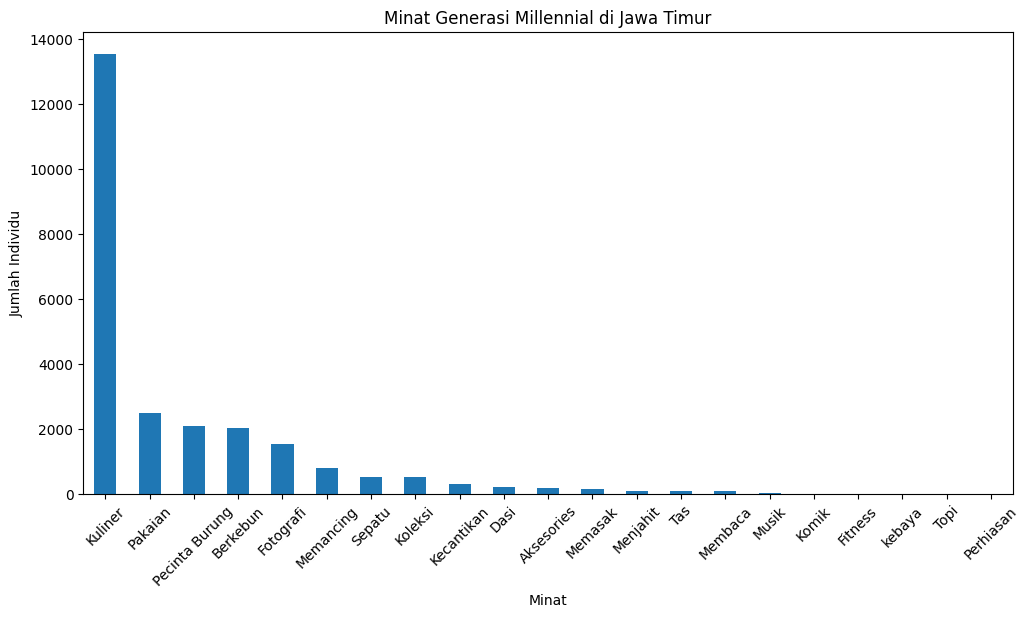

In [ ]:
# Filter data untuk Generasi Millennial di Jawa Timur
millennial_data_jawa_timur = dataframe[(dataframe['age_category'] == 'Gen Millennial') & (dataframe['province'] == 'Jawa Timur')]

# Menghitung jumlah individu dalam setiap minat
interest_counts = millennial_data_jawa_timur['interest'].value_counts()

# Membuat bar chart untuk minat generasi Millennial di Jawa Timur
plt.figure(figsize=(12, 6))
interest_counts.plot(kind='bar')
plt.xlabel('Minat')
plt.ylabel('Jumlah Individu')
plt.title('Minat Generasi Millennial di Jawa Timur')
plt.xticks(rotation=45)
plt.show()


# **GENDER PREDICTION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Pemrosesan data
dataframe = dataframe.dropna(subset=['gender', 'name', 'age', 'interest'])  # Hapus baris dengan nilai kosong
label_encoder = LabelEncoder()
dataframe['gender'] = label_encoder.fit_transform(dataframe['gender'])

# Memisahkan fitur dan label
X = dataframe[['name', 'age']]
y = dataframe['gender']

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the 'name' column into numerical features
X_tfidf = tfidf_vectorizer.fit_transform(dataframe['name'])

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Membangun model SVM
svm_model = SVC(kernel='linear')  # Anda dapat mengubah kernel sesuai kebutuhan

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Memprediksi gender untuk data uji
y_pred = svm_model.predict(X_test)

# Mengukur akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Prediksi:", accuracy)

Akurasi Prediksi: 0.9437603851561501
